In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [8]:
df_churn=pd.read_csv("Telecom_customer_churn.csv")

In [7]:
def missing_values_table(df_churn):
        zero_val = (df_churn == 0.00).astype(int).sum(axis=0)
        mis_val = df_churn.isnull().sum()
        mis_val_percent = 100 * df_churn.isnull().sum() / len(df_churn)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df_churn.nunique()
        mz_table['Data Type'] = df_churn.dtypes
        
        mz_table = mz_table.sort_values('Data Type', ascending=True).round(1)
        
        print ("Your selected dataframe has " + str(df_churn.shape[1]) + " columns and " + str(df_churn.shape[0]) + " Rows.\n"      
               )

        return mz_table

missing_values_table(df_churn)

Your selected dataframe has 21 columns and 7043 Rows.



,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
SeniorCitizen,5901,0,0.0,2,int64
tenure,11,0,0.0,73,int64
MonthlyCharges,0,0,0.0,1585,float64
customerID,0,0,0.0,7043,object
PaymentMethod,0,0,0.0,4,object
PaperlessBilling,0,0,0.0,2,object
Contract,0,0,0.0,3,object
StreamingMovies,0,0,0.0,3,object
StreamingTV,0,0,0.0,3,object
TechSupport,0,0,0.0,3,object


In [9]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Lets do the conversion of "TotalCharges" column to float type
df_churn["TotalCharges"]=df_churn["TotalCharges"].str.strip()
df_churn["TotalCharges"]=pd.to_numeric(df_churn["TotalCharges"])

In [11]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
def missing_values_table(df_churn):
        zero_val = (df_churn == 0.00).astype(int).sum(axis=0)
        mis_val = df_churn.isnull().sum()
        mis_val_percent = 100 * df_churn.isnull().sum() / len(df_churn)
        
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Missing Values'})
        mz_table['Attributes'] = df_churn.nunique()
        mz_table['Data Type'] = df_churn.dtypes
        
        mz_table = mz_table.sort_values('Data Type', ascending=True).round(1)
        
        print ("Your selected dataframe has " + str(df_churn.shape[1]) + " columns and " + str(df_churn.shape[0]) + " Rows.\n"      
               )

        return mz_table

missing_values_table(df_churn)

Your selected dataframe has 21 columns and 7043 Rows.



,Zero Values,Missing Values,% of Total Missing Values,Attributes,Data Type
SeniorCitizen,5901,0,0.0,2,int64
tenure,11,0,0.0,73,int64
MonthlyCharges,0,0,0.0,1585,float64
TotalCharges,0,11,0.2,6530,float64
customerID,0,0,0.0,7043,object
PaymentMethod,0,0,0.0,4,object
PaperlessBilling,0,0,0.0,2,object
Contract,0,0,0.0,3,object
StreamingMovies,0,0,0.0,3,object
StreamingTV,0,0,0.0,3,object


In [65]:
#lets chcek the rows where it raised null values
df_churn.loc[df_churn["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
#imputing the genrated null values with mean in "TotalCharges"
df_churn.dropna(inplace=True)

In [19]:
#Lets again chcek null values
df_churn.shape
#Hence imputation is successful

(7032, 21)

In [20]:
#Also lets delete "customerID" column as it will not add any significance to the model building process
df_churn.drop(columns=["customerID"],inplace=True)

In [21]:
#Lets chcek the value counts of each column of object datatype
for col in df_churn.columns:
    if df_churn[col].dtype=="object":
        print(df_churn[col].value_counts())
        print()

Male      3549
Female    3483
Name: gender, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

No                     2809
Yes                    2703
No internet service    1520
Name: S

# Lets do some graphical EDA

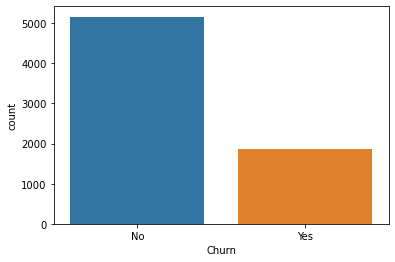

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Churn",data=df_churn)
plt.show()
#this shows dataset is imbalanced hence auc roc curve should be the metric

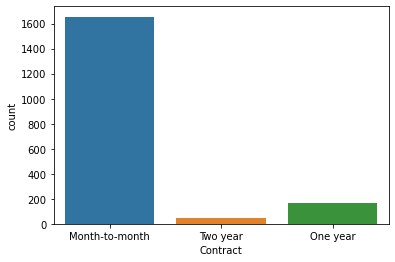

In [23]:
#Which "Contract" type of cutsomers are churning more
sns.countplot(x="Contract",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#Customers who have churned are mostly having contract of "Month to Month"

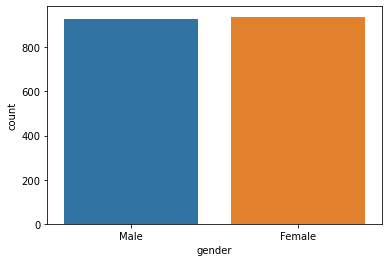

In [24]:
#Lets seen the churn on the basis of gender
sns.countplot(x="gender",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#So boh type of genders equally churned

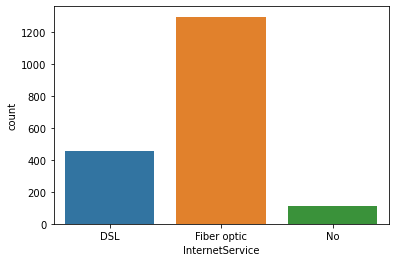

In [25]:
#Lets check the count of churn on the basis "InternetService" 
sns.countplot(x="InternetService",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#High amount of people i.e more than 1200 who churned are having InternetService of Fiber optic type
#So may be this type of service is bad and needs to be focussed on 

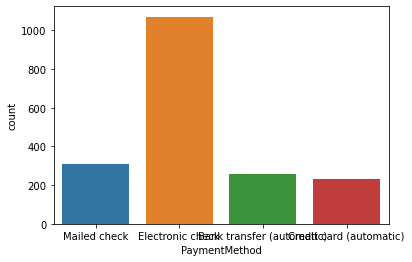

In [26]:
#lets check the count of customers who churned on basis of "PaymentMethod"
sns.countplot(x="PaymentMethod",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#Here we obseved churn is higher around 1100 i.e more than 50% of churn where customers are using "Electronic check"
#We can say this mode of payment has multiple issues because of which customers are dissatisfied

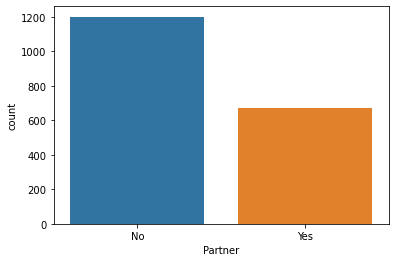

In [27]:
#Lets chcek the count of churn on the basis of "Partner" 
sns.countplot(x="Partner",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#churn in unmarried persons are more compared to married eventhough both type of customers almost equally exist in dataset

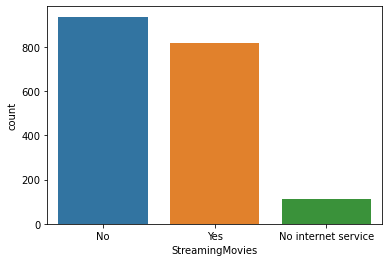

In [28]:
#lets chcek the count of customers churn on the basis "StreamingMovies"
sns.countplot(x="StreamingMovies",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#difficult to infer anything from thi plot

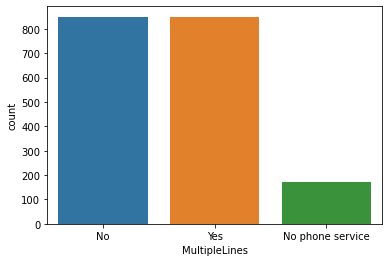

In [29]:
#lets chcek the count of customers churn on the basis "MultipleLines"
sns.countplot(x="MultipleLines",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

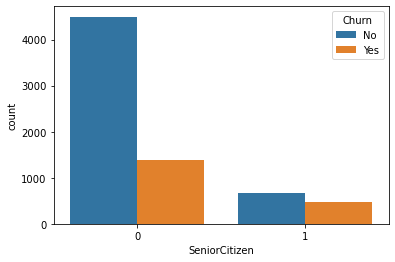

In [31]:
#Now lets check the count of "SeniorCitizen"
sns.countplot(x="SeniorCitizen",hue="Churn",data=df_churn)
plt.show()
#Most of the senior citizens churned ...we could inspect the reason for their churn

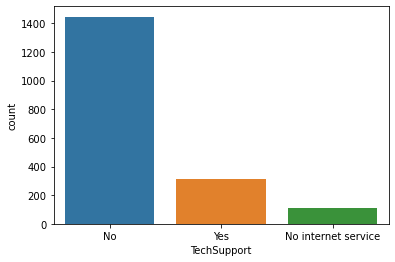

In [32]:
#lets chcek the count of customers churn on the basis "MultipleLines"
sns.countplot(x="TechSupport",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()
#Around 1400 people who churned were not having TechSupport
#We should chcek the reason behind this too

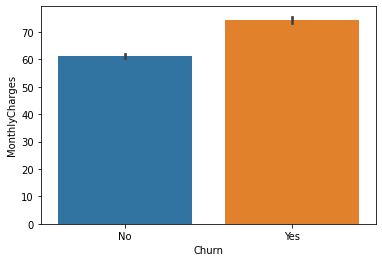

In [33]:
#lets chcek the average montly charges af the customers who chunrned compared to who didn't
sns.barplot(x="Churn",y="MonthlyCharges",data=df_churn)
plt.show()
#customers who churned were charged more than who didnt

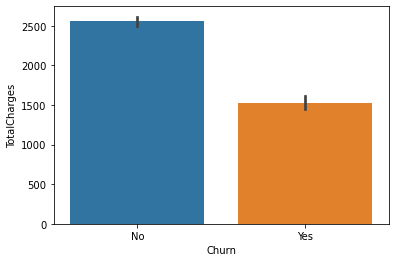

In [34]:
#lets chcek the average total charges af the customers who chunrned compared to who didn't
sns.barplot(x="Churn",y="TotalCharges",data=df_churn)
plt.show()
#customers who didnt chuned has averge total charges more

In [30]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
#Lets divide the dataset into input and output
df_x=df_churn.drop(columns=["Churn"])
y=df_churn[["Churn"]]

In [36]:
#Lets convert our dataset to a numeric form such that our M.L model can understand using on hot encoding
df_x=pd.get_dummies(df_x,drop_first=True)

In [37]:
#Lets chcek the shape
df_x.shape
#Number column increased from 20 to 30 in input as a result of one hot encoding

(7032, 30)

In [38]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [43]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_resample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [44]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean roc auc score for classifier: ",scores.mean())
    print("standard deviation in roc auc score for classifier: ",scores.std())
    print(scores)

In [45]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [46]:
#Lets chcek logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7501682447158217
auc roc score corresponding to  43  is  0.766671757147812
auc roc score corresponding to  44  is  0.769736399356011
auc roc score corresponding to  45  is  0.762499288195433
auc roc score corresponding to  46  is  0.7624526973510516
auc roc score corresponding to  47  is  0.7631903857204239
auc roc score corresponding to  48  is  0.7656804075145854
auc roc score corresponding to  49  is  0.7567362595834778
auc roc score corresponding to  50  is  0.7450277215524069
auc roc score corresponding to  51  is  0.7905508590834028
auc roc score corresponding to  52  is  0.7746465566777623
auc roc score corresponding to  53  is  0.7650346066438545
auc roc score corresponding to  54  is  0.7753143587805623
auc roc score corresponding to  55  is  0.7770666922053517
auc roc score corresponding to  56  is  0.7651497895646863
auc roc score corresponding to  57  is  0.7669940104881167
auc roc score corresponding to  58  is  0.7774588318122285


72

In [47]:
#lets print the scores for logistic regression
print("LOGISTIC CLASSIFIER\n\n")
model_evaluation(lg_clf,x,y)

LOGISTIC CLASSIFIER


Mean roc auc score for classifier:  0.8452703609141519
standard deviation in roc auc score for classifier:  0.010874717005839328
[0.85776333 0.85923612 0.83491821 0.83593199 0.83850216]


In [48]:
#Lets chcek the decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6458422848150085
auc roc score corresponding to  43  is  0.6888766947419643
auc roc score corresponding to  44  is  0.67705167959994
auc roc score corresponding to  45  is  0.6572518649279653
auc roc score corresponding to  46  is  0.6676933908298864
auc roc score corresponding to  47  is  0.6396651153641075
auc roc score corresponding to  48  is  0.652434889294977
auc roc score corresponding to  49  is  0.6611007863499179
auc roc score corresponding to  50  is  0.6301916436732222
auc roc score corresponding to  51  is  0.6649962986162519
auc roc score corresponding to  52  is  0.6612392646929405
auc roc score corresponding to  53  is  0.6586120587458779
auc roc score corresponding to  54  is  0.631735612488417
auc roc score corresponding to  55  is  0.6636826956427206
auc roc score corresponding to  56  is  0.6635675127218889
auc roc score corresponding to  57  is  0.6720043381252879
auc roc score corresponding to  58  is  0.6860644196074981
a

43

In [49]:
#Lets print the scores of decision tree
print("Decision tree CLASSIFIER\n\n")
model_evaluation(dc,df_x,y)

Decision tree CLASSIFIER


Mean roc auc score for classifier:  0.6523216155103346
standard deviation in roc auc score for classifier:  0.008993473464852462
[0.66449674 0.65985578 0.64211581 0.64256493 0.65257482]


In [50]:
#lets chcek random forest also
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [1]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

NameError: name 'RandomForestClassifier' is not defined

In [52]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

In [53]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.7136591413825057
auc roc score corresponding to  43  is  0.7403971092969442
auc roc score corresponding to  44  is  0.747380559193668
auc roc score corresponding to  45  is  0.7320754668143769
auc roc score corresponding to  46  is  0.7178769069891444
auc roc score corresponding to  47  is  0.7248150602316082
auc roc score corresponding to  48  is  0.7498705809878294
auc roc score corresponding to  49  is  0.7319602838935451
auc roc score corresponding to  50  is  0.7157104327254091
auc roc score corresponding to  51  is  0.7436235252703562
auc roc score corresponding to  52  is  0.7557707937526854
auc roc score corresponding to  53  is  0.7281113624715926
auc roc score corresponding to  54  is  0.741088206821935
auc roc score corresponding to  55  is  0.7418025997691164
auc roc score corresponding to  56  is  0.7414570510066211
auc roc score corresponding to  57  is  0.741088206821935
auc roc score corresponding to  58  is  0.7325827893420856


52

In [54]:
#Lets chcek SVM Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [55]:
svc=SVC(C=0.001,kernel="linear")
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7479784750298957
auc roc score corresponding to  43  is  0.7574752421429718
auc roc score corresponding to  44  is  0.7677316988574892
auc roc score corresponding to  45  is  0.7621770348551284
auc roc score corresponding to  46  is  0.7517122135310166
auc roc score corresponding to  47  is  0.7595951255623256
auc roc score corresponding to  48  is  0.7640212557785588
auc roc score corresponding to  49  is  0.7510897080824761
auc roc score corresponding to  50  is  0.737790610391829
auc roc score corresponding to  51  is  0.773701797888917
auc roc score corresponding to  52  is  0.7686078655698836
auc roc score corresponding to  53  is  0.7602176310108659
auc roc score corresponding to  54  is  0.766394800461767
auc roc score corresponding to  55  is  0.7700599468864374
auc roc score corresponding to  56  is  0.7551236986918326
auc roc score corresponding to  57  is  0.7667636446464532
auc roc score corresponding to  58  is  0.7693688493614466


75

In [56]:
#Cross val score for SVM classifier
print("SVM CLASSIFIER\n\n")
model_evaluation(svc,x,y)

SVM CLASSIFIER


Mean roc auc score for classifier:  0.8347587279140635
standard deviation in roc auc score for classifier:  0.009336837987083818
[0.84689472 0.84492237 0.83008053 0.8279676  0.82392841]


In [57]:
import lightgbm as lgb
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="roc_auc")
grid_search.fit(df_x,y)
grid_search.best_params_

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5163
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 7032, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265785 -> initscore=-1.016114
[LightGBM] [Info] Start training from score -1.016114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

{'learning_rate': 0.01,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [59]:
#LGBM also give provision to define which all columns should be treated as categorical
#So we will use above provision and see what is the result
params={'learning_rate': 0.01,'max_depth': 25,'n_estimators': 200,'num_leaves': 300}
max_auc_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
    x_train, y_train = SMOTE().fit_resample(x_train, y_train)
    d_train = lgb.Dataset(x_train, label=y_train)
    lgb_model = lgb.train(params, d_train)
    y_pred = lgb_model.predict(x_test)
    roc_scr=roc_auc_score(y_test,y_pred)
    print("roc score corresponding to ",r_state," is ",roc_scr)
    if roc_scr>max_auc_score:
        max_auc_score=roc_scr
        final_r_state=r_state
print("max roc score corresponding to ",final_r_state," is ",max_auc_score)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  46  is  0.809737227637689
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  51  is  0.8132858969514059
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  65  is  0.8176757898442314
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  69  is  0.8232990459230424
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[Li

roc score corresponding to  73  is  0.8107182237499416
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  77  is  0.8209940933162846
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  82  is  0.8126530379818917
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  87  is  0.8318834090003157
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  91  is  0.8008966149163177
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 30
[LightGBM] [Info] Start training from score 0.500000
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
roc score corresponding to  99  is  0.8163350088781441
max roc score corresponding to  72  is  0.8374251311014593


In [60]:
#The above model i.e light gradient boosting works better when categorical features are defined
#So we will use this to create our final model
#Also when compared to random forest its giving better and fast results
#Lets chcek the cross_val_scores
import numpy as np
from sklearn.model_selection import KFold
scores=[]
k_fold = KFold(n_splits=5)
for train_index,test_index in k_fold.split(df_x):
    x_train, x_test, y_train, y_test = df_x.iloc[train_index], df_x.iloc[test_index], y[train_index], y[test_index]
    d_train = lgb.Dataset(x_train, label=y_train)
    lgb_model = lgb.train(params, d_train)
    y_pred = lgb_model.predict(x_test)
    roc_scr=roc_auc_score(y_test,y_pred)
    scores.append(roc_scr)
print("Mean roc score for lgbm regressor: ",np.array(scores).mean())
print("standard deviation in roc score for lgbm regressor: ",np.array(scores).std())
print(scores)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] Start training from score 0.265778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mean roc score for lgbm regressor:  0.8293024113931041
standard deviation in roc score for lgbm regressor:  0.011576053601261781
[0.843172629431954, 0.8389735863369612, 0.8180923708947794, 0.8135864896924083, 0.8326869806094183]
